https://www.analyticsvidhya.com/blog/2017/07/introduction-to-genetic-algorithm/

http://hjemmesider.diku.dk/~pisinger/codes.html

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import cufflinks as cf
import numpy as np
import pandas as pd
from evol import Evolution, Population
from pprint import pprint as print

cf.go_offline()

# Typing monkey

In [4]:
np.random.seed(42)

In [5]:
class TypingMonkeyLogger:
    def __init__(self):
        self.generation = 0
        self.iterations = []

    def log(self, population):
        self.generation += 1
        for i in population.evaluate():
            string = i.chromosome
            fitness = i.fitness
            self.iterations.append(
                {"generation": self.generation, "string": string, "fitness": fitness}
            )

In [18]:
objective = "Essabeba wallew bandeya"

In [19]:
lower_case_letters = set(range(ord("a"), ord("z") + 1))
upper_case_letters = set(range(ord("A"), ord("Z") + 1))
punctuation = set([ord(" "), ord(".")])
characters = np.array(list(lower_case_letters.union(upper_case_letters).union(punctuation)))

In [20]:
def fitness(string):
    reference = np.array(list(objective))
    candidate = np.array(list(string))
    return np.sum(reference == candidate) / len(objective)

In [21]:
def random_candidate():
    return "".join([chr(i) for i in np.random.choice(characters, size=len(objective), replace=True)])

In [22]:
def select(population):
    top_10 = sorted(population, key=lambda x: x.fitness)[:-10]
    parent1, parent2 = np.random.choice(top_10, size=2)
    return parent1, parent2

In [23]:
def crossover(*parents):
    parent1, parent2 = parents
    m = np.random.randint(0, len(objective))
    child = f"{parent1[:m]}{parent2[m:]}"
    return child

In [24]:
def mutate(string):
    toss = np.random.exponential()
    if toss > 0.5:
        i = np.random.randint(0, len(objective))
        random_letter = chr(np.random.choice(characters))
        string_to_list = list(string)
        string_to_list[i] = random_letter
        return "".join(string_to_list)
    return string

In [25]:
logger = TypingMonkeyLogger()
pop = Population.generate(
    init_function=random_candidate, eval_function=fitness, size=200
)
evolution = (
    Evolution()
    .survive(fraction=0.2)
    .breed(parent_picker=select, combiner=crossover)
    .callback(logger.log)
    .mutate(mutate_function=mutate)
)

In [26]:
%%time
pop.evolve(evolution, 100)

Wall time: 2.42 s


<Population with size 200 at 2195245590960>

In [27]:
pop.evaluate()

<Population with size 200 at 2195245588664>

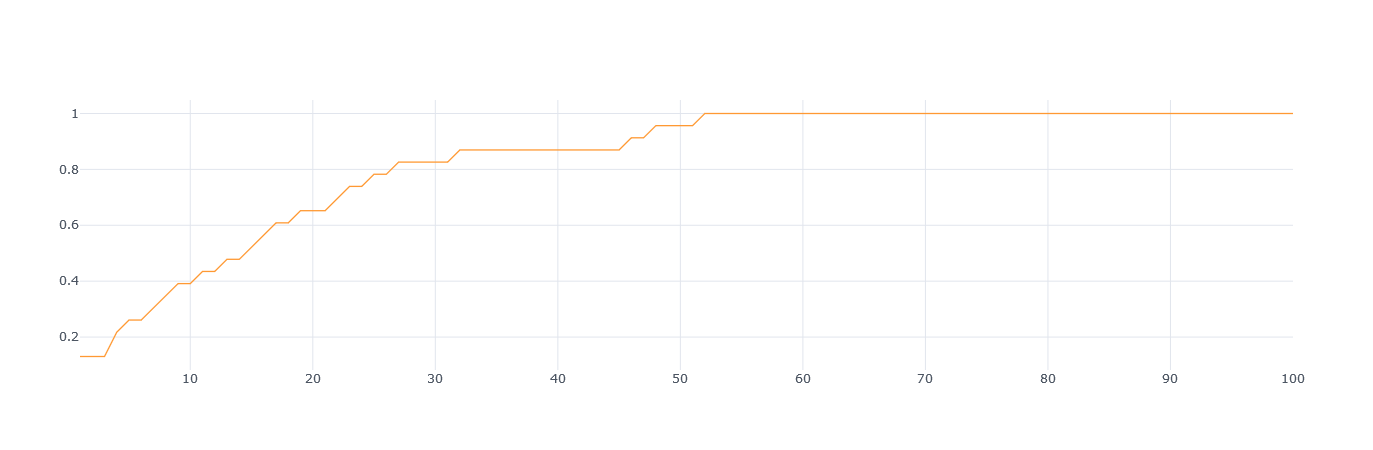

In [28]:
df = pd.DataFrame(logger.iterations)
df.groupby("generation").agg("max").iplot(kind="scatter", y="fitness")

In [29]:
df.string

0        tkOnmDmX NrlsNrNkavuXbe
1        eehSbQdv weXnzqYwZRFXcC
2        pphmrpnlAYqtKKwzbPleOmH
3        ellzYMAaclPVkzpsFatiiGq
4        ZZtpwrFaQaMcCuZrMFhdkkT
5        GruClOyapQlawJFoocMfXga
6        ISFXrJoKHxaFnyj GBenxSE
7        ScOWmeJxZuXhFdwwXCojKQD
8        GS mXLkaoxEVYnw..NJlXHM
9        RLJuUJyppknbtYVAbgeiluN
10       K gMacJCtrdHCYkSNaMjEPw
11       pNtcMeMdTvDbmOp.NsJsqJw
12       DJrymFmKoGRlHmYyBHuQHvt
13       SXLXKXmMYUTHCBvhNdIkegt
14       BUAR eHpAdqjcSVVxHDZ sr
15       YxraXGwJoXedIaFWRSBhoaQ
16       QwcpIOOvMDdlIKOZuPZtNhu
17       lRkYle.K.iCDvdtVOGyll.G
18       cMBuOqcaIdlAv FmOFoeX.s
19       uaMbvprJ.SaaNwce.pBkuC.
20       vtRpl KTwKg ryeCbCoWXQJ
21       OQRUJdaCuwo.DSgMPus.Cim
22       rEmcpiECxOIihY  LyZm Fq
23       msoXhalquBn.bsRbPbrg AU
24       HNBcdVPdyZIF z.SuxQnbyl
25       XveBsjVcff.oFuSJh nkNuD
26       cN rfXzbmwCVHjg.aQjynvL
27       tfj zcuOTda tZm.WSiXl d
28       OdHNtXTMJkAyV.BUUFnpJGI
29       cxdSuMbBfGJbVwazwTgRimw
          